In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# for randomized data splitting
from sklearn.model_selection import train_test_split

# to build linear regression model
import statsmodels.api as sm

#to check model perfomance 
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('ML auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.shape

(398, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
# Its a unique name and does not add information hence not required for the model building
df.drop(['car name'],axis=1,inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [11]:
df['horsepower']=df['horsepower'].replace('?',np.NAN)

In [12]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [13]:
df['horsepower']=df['horsepower'].astype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [15]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [16]:
df[df['cylinders']==4]['horsepower'].median()

78.0

In [17]:
df[df['cylinders']==6]['horsepower'].median()

100.0

In [18]:
df.loc[df['cylinders']==4,'horsepower']=df.loc[df['cylinders']==4,'horsepower'].fillna(78.0)
df.loc[df['cylinders']==6,'horsepower']=df.loc[df['cylinders']==6,'horsepower'].fillna(100.0)

In [19]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [20]:
df['origin']=df['origin'].replace({1:'America',2:'Europe',3:'Asia'})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [22]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.125628,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.313624,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<AxesSubplot:xlabel='mpg'>

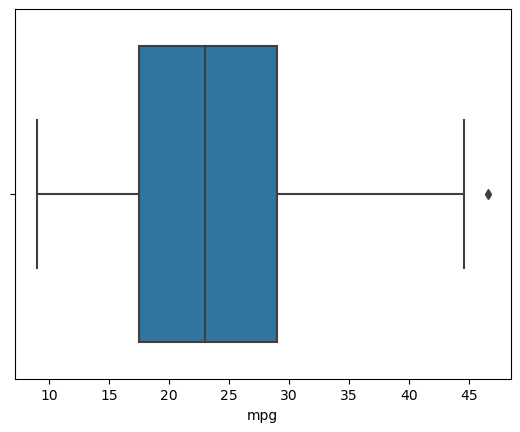

In [23]:
sns.boxplot(x='mpg',data=df)

<AxesSubplot:xlabel='cylinders'>

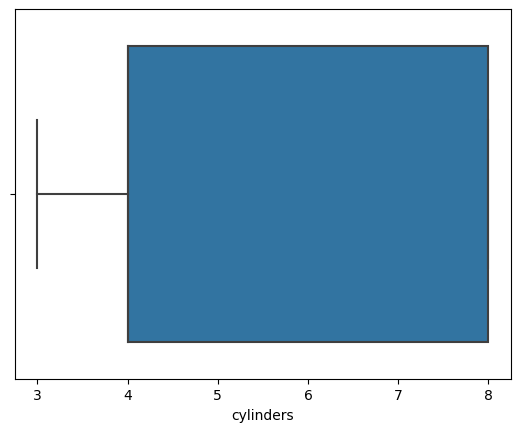

In [24]:
sns.boxplot(x='cylinders',data=df)

<AxesSubplot:xlabel='displacement'>

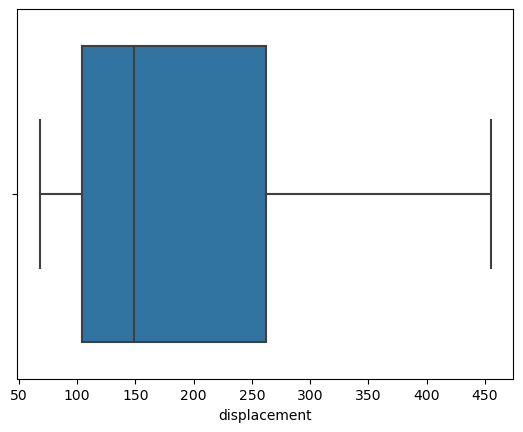

In [25]:
sns.boxplot(x='displacement',data=df)

<AxesSubplot:xlabel='horsepower'>

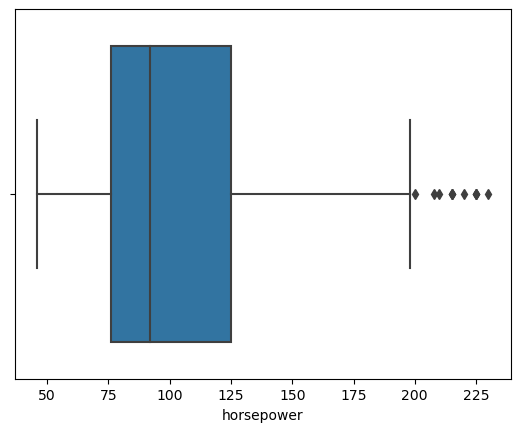

In [26]:
sns.boxplot(x='horsepower',data=df)

<AxesSubplot:xlabel='weight'>

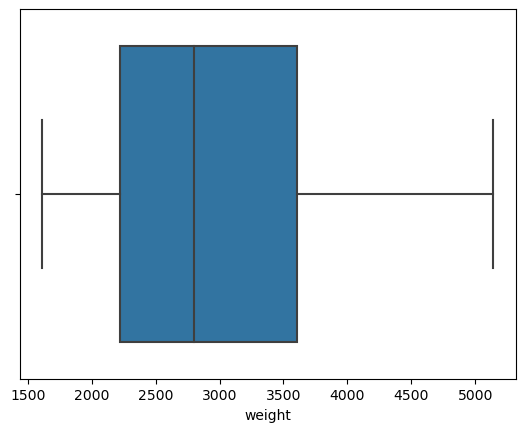

In [27]:
sns.boxplot(x='weight',data=df)

<AxesSubplot:xlabel='acceleration'>

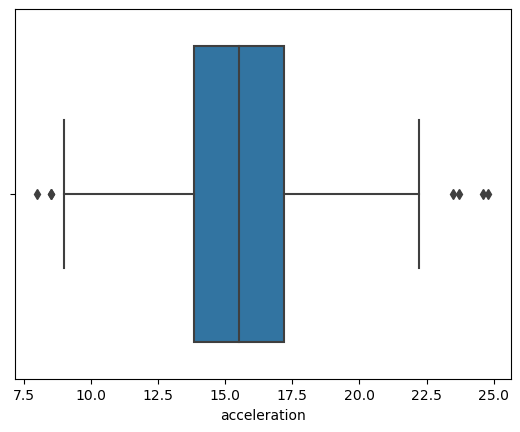

In [28]:
sns.boxplot(x='acceleration',data=df)

<AxesSubplot:xlabel='model year'>

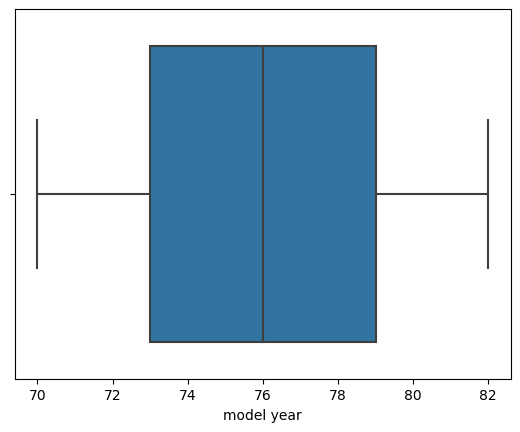

In [29]:
sns.boxplot(x='model year',data=df)

In [30]:
dups=df.duplicated()
df[dups]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [31]:
# Outlier Treatment
def remove_outlier(col):
    sorted (col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [32]:
lracc,uracc=remove_outlier(df['acceleration'])
df['acceleration']=np.where(df['acceleration']>uracc,uracc,df['acceleration'])
df['acceleration']=np.where(df['acceleration']<lracc,lracc,df['acceleration'])

lrhp,urhp=remove_outlier(df['horsepower'])
df['horsepower']=np.where(df['horsepower']>urhp,urhp,df['horsepower'])
df['horsepower']=np.where(df['horsepower']<lrhp,lrhp,df['horsepower'])

<AxesSubplot:xlabel='acceleration'>

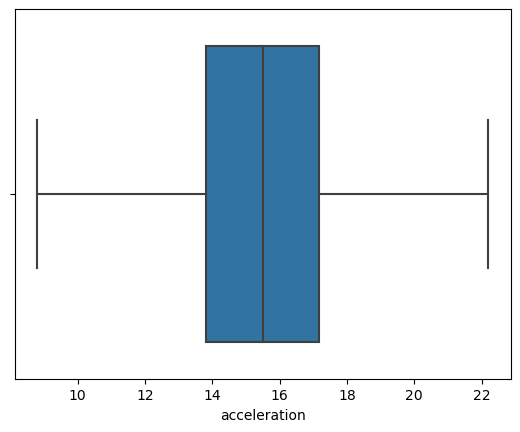

In [33]:
sns.boxplot(x='acceleration',data=df)

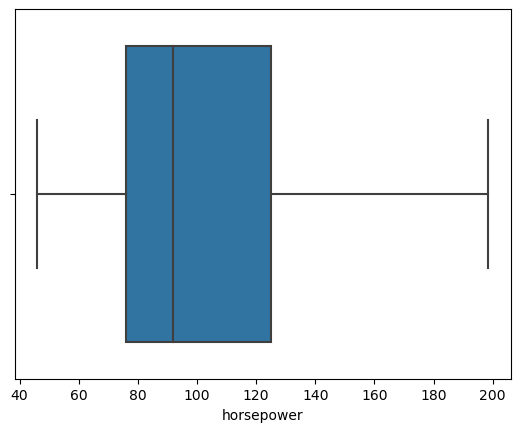

In [34]:
sns.boxplot(x='horsepower',data=df);

In [ ]:
# we are not treating outliers in mpg bcz its the dependant feature

#### One hot coding

In [35]:
# Create Dummy var for 'origin'

df=pd.get_dummies(df,columns=['origin'],drop_first=True)

In [36]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [37]:
df['model year']=pd.Categorical(df['model year']).codes

In [39]:
df['model year'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int8)

In [ ]:
df['cylinders'].unique()

In [38]:
df['cylinders']=pd.Categorical(df['cylinders']).codes


In [40]:
df['cylinders'].unique()

array([4, 1, 3, 0, 2], dtype=int8)

### Standardization

In [41]:
from scipy.stats import zscore

In [42]:
df[['displacement','horsepower','weight','acceleration']]=df[['displacement','horsepower','weight',
                                                              'acceleration']].apply(zscore)

In [43]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
0,18.0,4,1.090604,0.716754,0.630870,-1.320595,0,0,0
1,15.0,4,1.503514,1.667422,0.854333,-1.506489,0,0,0
2,18.0,4,1.196232,1.259993,0.550470,-1.692383,0,0,0
3,16.0,4,1.061796,1.259993,0.546923,-1.320595,0,0,0
4,17.0,4,1.042591,0.988374,0.565841,-1.878278,0,0,0


## Train & Test split

In [44]:
# separate Independent and Dependent Var into X and Y
# X will contain all the independent variable and y will have the dependent variable
x=df.drop(['mpg'],axis=1)
y=df[['mpg']]

In [45]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [46]:
# Train test Split (70:30)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [47]:
x_train.shape

(278, 8)

In [48]:
x_test.shape

(120, 8)

In [70]:
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
350,1,-0.849116,-1.103096,-0.893172,-0.242410,11,0,0
59,1,-0.925936,-1.347553,-0.847061,2.471644,2,0,1
120,1,-0.695475,0.227840,-0.121101,-0.019337,3,0,1
12,4,1.983643,1.259993,0.934732,-2.250066,0,0,0
349,1,-0.983552,-0.967286,-1.165111,0.166557,11,1,0


In [71]:
x_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
174,3,-0.215346,-0.179590,0.016051,-0.391125,5,0,0
359,1,-0.503423,-0.641343,0.306908,1.802425,11,0,1
250,4,1.196232,0.988374,0.903991,-0.874449,8,0,0
274,2,-0.599449,-0.016618,-0.166030,0.129379,8,0,1
283,3,0.370411,-0.369723,0.348290,0.984491,9,0,0


In [72]:
y_train.head()

,mpg
350,34.7
59,23.0
120,19.0
12,15.0
349,34.1


In [73]:
y_test.head()

,mpg
174,18.0
359,28.1
250,19.4
274,20.3
283,20.2


## Model building

In [49]:
# first approach using sklearn
from sklearn.linear_model import LinearRegression

In [50]:
regression_model=LinearRegression()

In [51]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [52]:
regression_model.coef_[0]

array([-1.24906132,  4.01022715, -1.49599715, -5.7578894 , -0.01484402,
        0.82008819,  2.53088805,  2.9742682 ])

In [53]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for cylinders is -1.2490613244867814
The coeff for displacement is 4.0102271534072695
The coeff for horsepower is -1.495997151278866
The coeff for weight is -5.757889400140118
The coeff for acceleration is -0.01484402472233991
The coeff for model year is 0.8200881927892256
The coeff for origin_Asia is 2.5308880484445706
The coeff for origin_Europe is 2.9742682001865512


In [54]:
intercept=regression_model.intercept_[0]
intercept

20.42598202494969

In [55]:
# R Squre on the Train data
regression_model.score(x_train,y_train)

0.8199303032592258

In [56]:
# R Squre on the Test data
regression_model.score(x_test,y_test)

0.8450574836372762

In [57]:
predicted_train=regression_model.predict(x_train)
predicted_test=regression_model.predict(x_test)

In [58]:
predicted_train

array([[31.58935547],
       [26.93467763],
       [22.17916874],
       [16.15096334],
       [34.93767887],
       [33.81327773],
       [13.8115415 ],
       [32.48928946],
       [28.71373506],
       [29.62049436],
       [30.23997561],
       [25.0496185 ],
       [10.05750494],
       [34.60002409],
       [25.26769922],
       [13.42505139],
       [29.53556345],
       [16.11885672],
       [31.0339404 ],
       [23.03766961],
       [16.57719815],
       [20.60543542],
       [11.51330943],
       [26.99091586],
       [26.0115959 ],
       [24.12273267],
       [13.53847918],
       [20.66689159],
       [18.49962277],
       [20.85403815],
       [15.11816662],
       [10.1595155 ],
       [14.97393009],
       [33.29935571],
       [29.63987058],
       [11.64925441],
       [11.37241868],
       [26.07464049],
       [23.47144589],
       [17.81623979],
       [20.1157557 ],
       [35.85105406],
       [29.0343358 ],
       [29.58275898],
       [ 6.95782057],
       [15

In [59]:
y_train.head()

,mpg
350,34.7
59,23.0
120,19.0
12,15.0
349,34.1


In [60]:
# MSE on train data

MSE_train=mean_squared_error(y_train,predicted_train)
MSE_train

11.160240388579888

In [61]:
# RMSE on train data

RMSE_train=np.sqrt(mean_squared_error(y_train,predicted_train))
RMSE_train

3.340694596723844

In [ ]:
#or

In [62]:
mean_squared_error(y_train,predicted_train,squared=False)

3.340694596723844

### MAPE

In [63]:
from sklearn.metrics import mean_absolute_percentage_error

In [64]:
mean_absolute_percentage_error(y_train,predicted_train)

0.12050577453605958

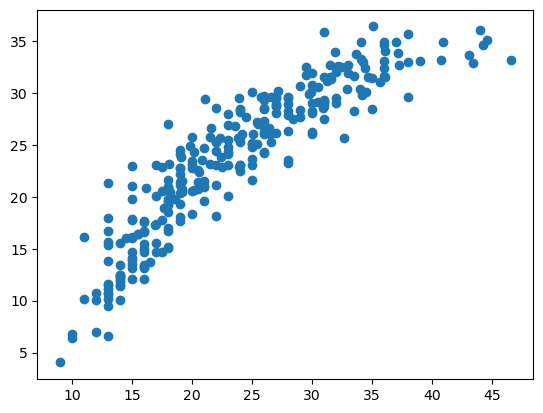

In [65]:
# Plot between actual and predicted values of the y variable ('mpg')
plt.scatter(y_train,predicted_train)

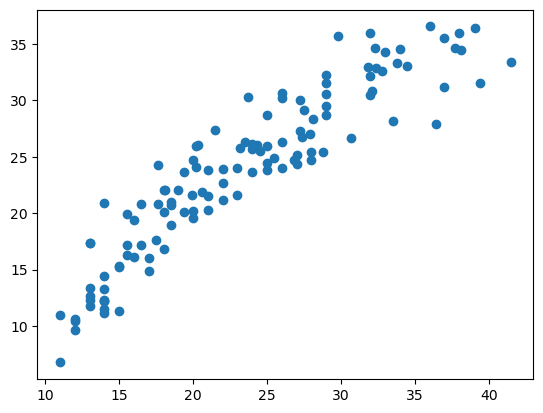

In [66]:
plt.scatter(y_test,predicted_test)

# Linear Regression using the stats model

In [67]:
# Concate X and Y

data_train=pd.concat([x_train,y_train],axis=1)
data_test=pd.concat([x_test,y_test],axis=1)

In [68]:
data_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe,mpg
350,1,-0.849116,-1.103096,-0.893172,-0.242410,11,0,0,34.7
59,1,-0.925936,-1.347553,-0.847061,2.471644,2,0,1,23.0
120,1,-0.695475,0.227840,-0.121101,-0.019337,3,0,1,19.0
12,4,1.983643,1.259993,0.934732,-2.250066,0,0,0,15.0
349,1,-0.983552,-0.967286,-1.165111,0.166557,11,1,0,34.1


In [69]:
data_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe,mpg
174,3,-0.215346,-0.179590,0.016051,-0.391125,5,0,0,18.0
359,1,-0.503423,-0.641343,0.306908,1.802425,11,0,1,28.1
250,4,1.196232,0.988374,0.903991,-0.874449,8,0,0,19.4
274,2,-0.599449,-0.016618,-0.166030,0.129379,8,0,1,20.3
283,3,0.370411,-0.369723,0.348290,0.984491,9,0,0,20.2


In [74]:
data_train.rename(columns={'model year':'model_year'},inplace=True)

In [75]:
data_test.rename(columns={'model year':'model_year'},inplace=True)

In [76]:
import statsmodels.formula.api as smf

In [77]:
expr='mpg ~ cylinders+displacement+horsepower+weight+acceleration+model_year+origin_Asia+origin_Europe'

In [78]:
lm1=smf.ols(formula=expr,data=data_train).fit()

In [79]:
# F-statistics : H0:All the coeff are zero
#                Ha: All the coeff are not zero for one of the ind variable
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     153.1
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.69e-95
Time:                        17:41:45   Log-Likelihood:                -729.78
No. Observations:                 278   AIC:                             1478.
Df Residuals:                     269   BIC:                             1510.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.4260      1.120     18.232

In [72]:
# P_value Interpretation
#H0: there is no relationship b/w the ind variable and the dependent variable
#H0: there is relationship b/w the ind variable and the dependent variable

In [80]:
# MSE on train
mean_squared_error(lm1.predict(data_train.drop('mpg',axis=1)),data_train['mpg'])

11.16024038857989

In [81]:
# RMSE on train
mean_squared_error(lm1.predict(data_train.drop('mpg',axis=1)),data_train['mpg'],squared=False)

3.3406945967238446

In [82]:
# MSE on test
mean_squared_error(lm1.predict(data_test.drop('mpg',axis=1)),data_test['mpg'])

9.059015065865953

In [83]:
# RMSE on train
mean_squared_error(lm1.predict(data_test.drop('mpg',axis=1)),data_test['mpg'],squared=False)

3.009819772987405

In [84]:
# Acceleration has no effect on R**2 ,so we are dropping d acceleration value 
# and calculating R2 again to check whether any effect is happening

In [85]:
data_train.drop('acceleration',axis=1,inplace=True)

In [86]:
data_test.drop('acceleration',axis=1,inplace=True)

In [87]:
data_test.head()

,cylinders,displacement,horsepower,weight,model_year,origin_Asia,origin_Europe,mpg
174,3,-0.215346,-0.179590,0.016051,5,0,0,18.0
359,1,-0.503423,-0.641343,0.306908,11,0,1,28.1
250,4,1.196232,0.988374,0.903991,8,0,0,19.4
274,2,-0.599449,-0.016618,-0.166030,8,0,1,20.3
283,3,0.370411,-0.369723,0.348290,9,0,0,20.2


In [88]:
expr='mpg ~ cylinders+displacement+horsepower+weight+model_year+origin_Asia+origin_Europe'

In [89]:
lm2=smf.ols(formula=expr,data=data_train).fit()

In [90]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.23e-96
Time:                        17:44:37   Log-Likelihood:                -729.78
No. Observations:                 278   AIC:                             1476.
Df Residuals:                     270   BIC:                             1505.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.4271      1.118     18.271

In [84]:
# R2 doest not affected by dropping acceleration

In [85]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
count,398.000000,398.000000,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,398.000000,398.000000,398.000000
mean,23.514573,2.195980,-8.312725e-17,9.093787e-17,-9.902743e-17,-8.647466e-17,6.010050,0.198492,0.175879
std,7.815984,1.328541,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,3.697627,0.399367,0.381197
min,9.000000,0.000000,-1.204411e+00,-1.564849e+00,-1.604943e+00,-2.510317e+00,0.000000,0.000000,0.000000
25%,17.500000,1.000000,-8.563178e-01,-7.499903e-01,-8.828266e-01,-6.420819e-01,3.000000,0.000000,0.000000
50%,23.000000,1.000000,-4.314040e-01,-3.153993e-01,-1.973624e-01,-1.933672e-02,6.000000,0.000000,0.000000
75%,29.000000,4.000000,6.584879e-01,5.809448e-01,7.538337e-01,6.034085e-01,9.000000,0.000000,0.000000
max,46.600000,4.000000,2.511784e+00,2.577347e+00,2.565185e+00,2.471644e+00,12.000000,1.000000,1.000000


In [91]:
# Predting a new record
values=np.array([4,0.7,1.0,1.5,0.9,9,0,1])

In [92]:
LR=LinearRegression()

In [93]:
LR.fit(x_train,y_train)

LinearRegression()

In [94]:
LR.predict(values.reshape(1,-1))

array([[18.4457668]])

# Regularization of Linear Regression Model

In [90]:
# Linear Regression Model

In [95]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [96]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for cylinders is -1.2490613244867814
The coeff for displacement is 4.0102271534072695
The coeff for horsepower is -1.495997151278866
The coeff for weight is -5.757889400140118
The coeff for acceleration is -0.01484402472233991
The coeff for model year is 0.8200881927892256
The coeff for origin_Asia is 2.5308880484445706
The coeff for origin_Europe is 2.9742682001865512


In [97]:
predicted_train=regression_model.predict(x_train)
predicted_test=regression_model.predict(x_test)

In [98]:
regression_model.score(x_train,y_train)

0.8199303032592258

In [99]:
regression_model.score(x_test,y_test)

0.8450574836372762

### Ridge & Lasso

In [100]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [101]:
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [102]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,ridge_model.coef_[0][idx]))

The coeff for cylinders is -1.2371812584689617
The coeff for displacement is 3.9466380346801615
The coeff for horsepower is -1.496175052156544
The coeff for weight is -5.722270664015404
The coeff for acceleration is -0.02279774013488053
The coeff for model year is 0.819092757090571
The coeff for origin_Asia is 2.508951113500535
The coeff for origin_Europe is 2.9471227313799995


In [103]:
ridge_model.score(x_train,y_train)

0.8199267925267955

In [104]:
ridge_model.score(x_test,y_test)

0.8452897052895534

In [105]:
# Lasso Regression Model---------L2
Lasso_model=Lasso(alpha=0.1)    # Learning rate= tol=0.0001
Lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [106]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,Lasso_model.coef_[idx]))

The coeff for cylinders is -0.29933277398627806
The coeff for displacement is 0.0
The coeff for horsepower is -0.3099213299420828
The coeff for weight is -4.760117108094546
The coeff for acceleration is -0.0
The coeff for model year is 0.7737271511416278
The coeff for origin_Asia is 0.44877354248001877
The coeff for origin_Europe is 0.753427764685994


In [107]:
Lasso_model.score(x_train,y_train)

0.8038287941076312

In [108]:
Lasso_model.score(x_test,y_test)

0.8388751783542635

# VIF - Variance Infaltion Factor

In [105]:
# If we dont have any industry knowledge then we go for VIF 

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
x.values

array([[ 4.        ,  1.0906037 ,  0.71675448, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  1.5035143 ,  1.6674224 , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  1.19623199,  1.25999329, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.56103873, -0.53269479, ..., 12.        ,
         0.        ,  0.        ],
       [ 1.        , -0.70507731, -0.6685045 , ..., 12.        ,
         0.        ,  0.        ],
       [ 1.        , -0.71467988, -0.58701867, ..., 12.        ,
         0.        ,  0.        ]])

In [111]:
x.shape[1]

8

In [112]:
#Variable having VIF>10 are causing multicolinearity

VIF=[variance_inflation_factor(x.values,ix) for ix in range(x.shape[1])]
i=0
for column in x.columns:
    if i<10:
        print(column,VIF[i])
        i=i+1

cylinders 6.266829028013232
displacement 16.65810671244766
horsepower 11.056730765200188
weight 11.58702375000288
acceleration 2.829579531949127
model year 4.0474629045218995
origin_Asia 2.0939270769567764
origin_Europe 1.8470022422139647


In [110]:
# Here we drop variable('Displacement') and again check VIF until there is no variable greater than 10 
# and we have to drop it one by one

In [111]:
# Multicolinearity-Very strong relationship between two variables 
# which causes problem to have an impact on R2

# Decision Tree Regression

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
dt_model=DecisionTreeRegressor(max_depth=3)

In [114]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [115]:
dt_model.score(x_train,y_train)

0.8252713272277856

In [116]:
from sklearn import metrics

In [117]:
# 
predicted_train=dt_model.predict(x_train)
metrics.mean_squared_error(y_train,predicted_train,squared=False)

3.2907777109502656

In [118]:
dt_model.score(x_test,y_test)

0.7892652919447365

In [119]:
# 
predicted_test=dt_model.predict(x_test)
metrics.mean_squared_error(y_test,predicted_test,squared=False)

3.5101301803507403

In [120]:
dt_model.feature_importances_

array([0.68861316, 0.        , 0.18160969, 0.        , 0.        ,
       0.12977715, 0.        , 0.        ])

In [121]:
print(pd.DataFrame(dt_model.feature_importances_,columns=["Imp"],
                   index=x_train.columns).sort_values('Imp',ascending=False))

                    Imp
cylinders      0.688613
horsepower     0.181610
model year     0.129777
displacement   0.000000
weight         0.000000
acceleration   0.000000
origin_Asia    0.000000
origin_Europe  0.000000
